In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

In [35]:
# Load dataset
from google.colab import files
files.upload()
df = pd.read_csv("nyc_climate.csv")  # Adjust path if necessary
df['DATE'] = pd.to_datetime(df['DATE'])  # Convert DATE to datetime format
df.set_index('DATE', inplace=True)  # Set DATE as index

Saving nyc_climate.csv to nyc_climate (4).csv


In [37]:
# Create weather categories based on TAVG
def categorize_temp(temp):
    if temp < 5:
        return "Cold"
    elif 5 <= temp <= 20:
        return "Mild"
    else:
        return "Hot"

df['WeatherCategory'] = df['TAVG'].apply(categorize_temp)

In [38]:
# Convert categories to numerical labels
category_map = {"Cold": 0, "Mild": 1, "Hot": 2}
df['WeatherLabel'] = df['WeatherCategory'].map(category_map)

In [39]:
# Define features (X) and target (y)
df['Year'] = df.index.year
df['DayOfYear'] = df.index.dayofyear
X = df[['Year', 'DayOfYear', 'TMAX', 'TMIN', 'PRCP']]  # Features
y = df['WeatherLabel']  # Target variable

In [40]:
# Split dataset into training & testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Naive Bayes classifier
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Make predictions
y_pred = nb_model.predict(X_test)

# Evaluate model performance
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.97      0.87        89
           1       0.98      0.88      0.93       215
           2       0.97      1.00      0.99       135

    accuracy                           0.93       439
   macro avg       0.92      0.95      0.93       439
weighted avg       0.94      0.93      0.93       439



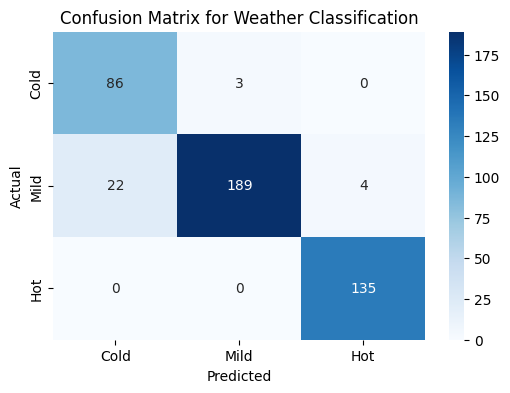

In [41]:
# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues",
            xticklabels=category_map.keys(), yticklabels=category_map.keys())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Weather Classification")
plt.show()